In [125]:
!pip install fancyimpute

In [126]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests, zipfile, io
import missingno as msno
import multiprocessing
import sklearn
from tqdm import tqdm

In [145]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import fancyimpute
from fancyimpute import IterativeImputer
from sklearn.decomposition import PCA

In [132]:
df = pd.read_csv('csv_preprocessed.csv', low_memory=False)
df.describe()

,Dur,sTos,dTos,sTtl,dTtl,sHops,dHops,TotPkts,SrcPkts,DstPkts,...,Cause_Status,State_ACC,State_CON,State_ECO,State_FIN,State_INT,State_REQ,State_RST,State_URP,Attack Type
count,1.215675e+06,1.215675e+06,1.215675e+06,1.215675e+06,1.215675e+06,1.215675e+06,1.215675e+06,1.215675e+06,1.215675e+06,1.215675e+06,...,1.215675e+06,1.215675e+06,1.215675e+06,1.215675e+06,1.215675e+06,1.215675e+06,1.215675e+06,1.215675e+06,1.215675e+06,1.215675e+06
mean,4.004418e-16,9.127304e-17,1.204505e-16,1.077321e-16,3.433961e-15,-7.359824e-17,-5.308051e-16,2.749413e-17,2.899041e-17,3.721995e-17,...,5.992416e-01,9.122504e-04,1.087009e-01,2.370782e-02,4.868160e-02,2.704111e-01,4.846098e-01,6.224525e-02,6.465544e-04,3.345480e+00
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,4.900524e-01,3.018972e-02,3.112637e-01,1.521374e-01,2.152016e-01,4.441724e-01,4.997633e-01,2.416006e-01,2.541922e-02,3.260681e+00
min,-8.070846e-01,-6.904596e-02,-9.473906e-02,-8.127508e-01,-2.027293e+00,-6.332522e-01,-9.730588e-01,-1.670113e-01,-2.010034e-01,-1.158561e-01,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,-8.070846e-01,-6.904596e-02,-9.473906e-02,-3.299762e-01,-7.320131e-03,-3.526917e-01,-9.730588e-01,-1.670113e-01,-1.466962e-01,-1.158561e-01,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,-8.070846e-01,-6.904596e-02,-9.473906e-02,-3.299762e-01,-7.320131e-03,-3.526917e-01,-1.939318e-13,-1.267248e-01,-1.466962e-01,-1.158561e-01,...,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
75%,7.185632e-01,-6.904596e-02,-1.773502e-16,-3.299762e-01,1.190749e-13,-3.526917e-01,-1.939318e-13,-1.267248e-01,-9.238911e-02,-1.158561e-01,...,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,7.000000e+00
max,1.097086e+01,1.782382e+01,1.847537e+01,3.103087e+00,1.428212e+01,7.222442e+00,2.128461e+01,1.608177e+02,5.334583e+01,2.526345e+02,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,8.000000e+00


In [135]:
print(df.shape)

(1215675, 63)


In [136]:
pd.set_option('float_format', '{:f}'.format)
plt.rcParams["figure.figsize"] = (10, 5)
plt.rcParams["xtick.labelsize"] = 7
#pd.set_option('future.no_silent_downcasting', True)

In [137]:
# Train Test split
X_train, X_test, y_train, y_test = train_test_split(df.loc[:, df.columns != 'Attack Type'], df['Attack Type'],
                                                    stratify=df['Attack Type'],
                                                    test_size=0.15)

X_train = pd.DataFrame(X_train, columns=df.columns.to_list()[:-1])
X_test = pd.DataFrame(X_test, columns=df.columns.to_list()[:-1])
y_train = pd.DataFrame(y_train, columns=['Attack Type'])
y_test = pd.DataFrame(y_test, columns=['Attack Type'])

print("Training dataset size:", X_train.shape)
print("Testing dataset size:", X_test.shape)
print("Training target size:", y_train.shape)
print("Testing target size:", y_test.shape)

Training dataset size: (1033323, 62)
Testing dataset size: (182352, 62)
Training target size: (1033323, 1)
Testing target size: (182352, 1)


In [138]:
def mutual_info(X, Y):
  mutual_info_arr = mutual_info_classif(X, Y)
  series_info = pd.Series(mutual_info_arr)
  series_info.index = X.columns
  series_top = series_info.sort_values(ascending=False)[:20]
  return series_top

In [139]:
from sklearn.feature_selection import mutual_info_classif

In [140]:
result = mutual_info(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [146]:
train_df = X_train[result.keys()]

In [155]:
test_df =X_test[result.keys()]

In [149]:
def get_pca_df(scaled_data, no_of_components, pca_model):
  Principal_components = pca.transform(scaled_data)
  column_names = ["PC "+str(i) for i in range(1, no_of_components+1)]
  pca_df = pd.DataFrame(data = Principal_components, columns = column_names)
  return pca_df

In [147]:
def get_pca_model(train_data, no_of_components):
  pca = PCA(n_components=no_of_components)
  pca_model=pca.fit(train_data)
  return pca_model

In [148]:
pca = get_pca_model(train_df, 15)

In [150]:
train_df = get_pca_df(train_df, 15, pca)

In [152]:
train_df.head()

,PC 1,PC 2,PC 3,PC 4,PC 5,PC 6,PC 7,PC 8,PC 9,PC 10,PC 11,PC 12,PC 13,PC 14,PC 15
0,-0.867241,0.441037,-0.171605,0.298907,-0.053498,0.033669,0.249277,0.184614,-0.088391,0.042367,0.074768,-0.006139,-0.506484,0.082808,-0.082083
1,-0.574906,0.178660,0.003652,0.009630,-0.030666,0.014250,0.137507,0.058541,-0.006614,-0.005558,0.097030,0.010549,0.215866,-0.093899,-0.020913
2,-0.866113,0.442334,-0.171887,0.299217,-0.053645,0.033678,0.249145,0.184561,-0.088396,0.042361,0.074799,-0.006149,-0.506398,0.083307,-0.081753
3,-0.574906,0.178660,0.003652,0.009630,-0.030666,0.014250,0.137507,0.058541,-0.006614,-0.005558,0.097030,0.010549,0.215866,-0.093899,-0.020913
4,-0.573778,0.179956,0.003370,0.009939,-0.030814,0.014260,0.137375,0.058488,-0.006619,-0.005565,0.097061,0.010540,0.215952,-0.093401,-0.020583


In [156]:
test_df = get_pca_df(test_df, 15, pca)

In [157]:
test_df.head()

,PC 1,PC 2,PC 3,PC 4,PC 5,PC 6,PC 7,PC 8,PC 9,PC 10,PC 11,PC 12,PC 13,PC 14,PC 15
0,-0.574906,0.178660,0.003652,0.009630,-0.030666,0.014250,0.137507,0.058541,-0.006614,-0.005558,0.097030,0.010549,0.215866,-0.093899,-0.020913
1,-0.572650,0.181253,0.003088,0.010248,-0.030961,0.014269,0.137243,0.058434,-0.006624,-0.005571,0.097092,0.010530,0.216038,-0.092902,-0.020252
2,-0.606089,0.455506,-0.177732,0.267305,-0.059159,0.021344,0.046775,0.074011,-0.057565,0.032935,-0.006636,-0.008258,-0.416350,0.090552,0.142484
3,-0.573778,0.179956,0.003370,0.009939,-0.030814,0.014260,0.137375,0.058488,-0.006619,-0.005564,0.097061,0.010540,0.215952,-0.093401,-0.020583
4,-0.573778,0.179956,0.003370,0.009939,-0.030814,0.014260,0.137375,0.058488,-0.006619,-0.005564,0.097061,0.010540,0.215952,-0.093401,-0.020583


In [159]:
test_df.shape

(182352, 15)

In [160]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 5, criterion = "gini", random_state =21)

In [163]:
rfc.fit(train_df.values, y_train.values)

<ipython-input-163-2de205f293cd>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc.fit(train_df.values, y_train.values)


RandomForestClassifier(n_estimators=5, random_state=21)

In [164]:
y_pred = rfc.predict(test_df)
print(y_pred)

[7 7 0 ... 6 0 0]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


In [165]:
y_pred_vertical = y_pred.reshape(len(y_pred), 1)
print (y_pred_vertical)

[[7]
 [7]
 [0]
 ...
 [6]
 [0]
 [0]]


In [166]:
y_true_vertical = y_test.to_numpy().reshape(len(y_test), 1)
print(y_true_vertical)

[[7]
 [7]
 [0]
 ...
 [6]
 [0]
 [0]]


In [167]:
true_pred = np.concatenate((y_true_vertical, y_pred_vertical), axis = 1)
print(true_pred)

[[7 7]
 [7 7]
 [0 0]
 ...
 [6 6]
 [0 0]
 [0 0]]


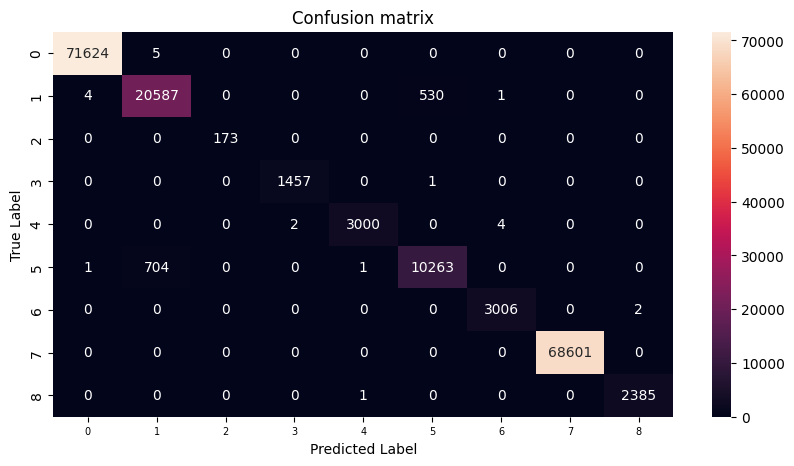

In [169]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

confusion_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(confusion_mat, annot=True, fmt = 'd')
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion matrix")
plt.show()

In [170]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9931122225146969

In [171]:
from sklearn.metrics import precision_score

precision = precision_score(y_test, y_pred, average='weighted') # Use 'binary' for binary classification
print(f'Precision: {precision}')

Precision: 0.9930968045042499


In [172]:
from sklearn.metrics import recall_score

recall = recall_score(y_test, y_pred, average='weighted') # Use 'binary' for binary classification
print(f'Recall: {recall}')

Recall: 0.9931122225146969


In [173]:
from sklearn.metrics import f1_score

f1 = f1_score(y_test, y_pred, average='weighted') # Use 'binary' for binary classification
print(f'F1 Score: {f1}')

F1 Score: 0.9930989400155712
